# Logistic regression (Logistic classificator)

## What is the logistic regression?



La regresión logística es un método estadístico para predecir clases binarias. El resultado o variable objetivo es de naturaleza dicotómica, es decir, solo hay dos posibles resultados. En la regresión logística, la variable dependiente es binaria o dicotómica, es decir, solo puede tener dos valores posibles, como 0 o 1, Verdadero o Falso, Sí o No, etc. 

La regresión logística predice la probabilidad de que la variable dependiente sea 1 dada la variable independiente.

Se trata de un caso especial de una regresión lineal, dónde la variable objetivo es de naturaleza categórica. Utiliza un conjunto de probabilidades como variable dependiente. La regresión logística predice la probabilidad de ocurrencia de un evento binario utilizando una función logística (Principalmente una sigmoide)

### Ecuación de regresión lineal

$$
y = \beta_0 + \beta_1 X_1 \beta_2 X_2 + ... + \beta_n X_n
$$

In [2]:
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']


# load dataset
pima = pd.read_csv("./diabetes.csv", header=0, names=col_names)

In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

/var/folders/cg/l549l5jn7ql8v5_67ml6_p2m0000gn/T/ipykernel_8736/2672516660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=pima, palette='pastel')


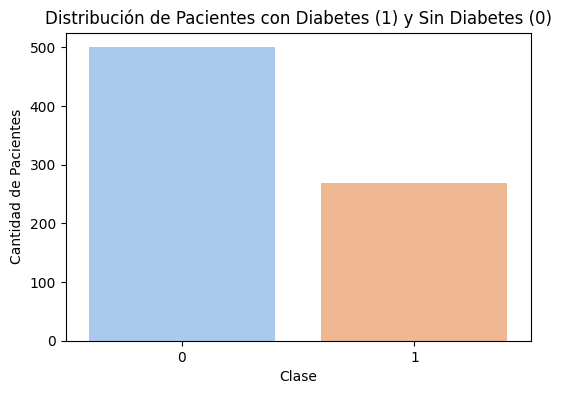

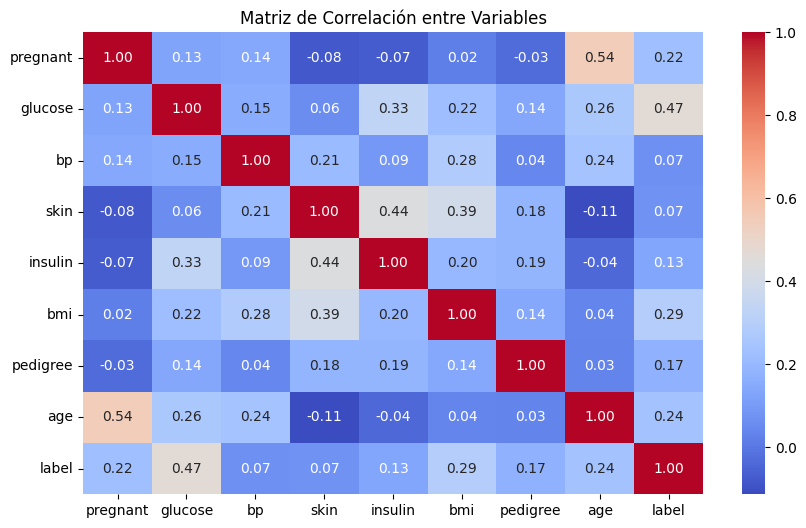

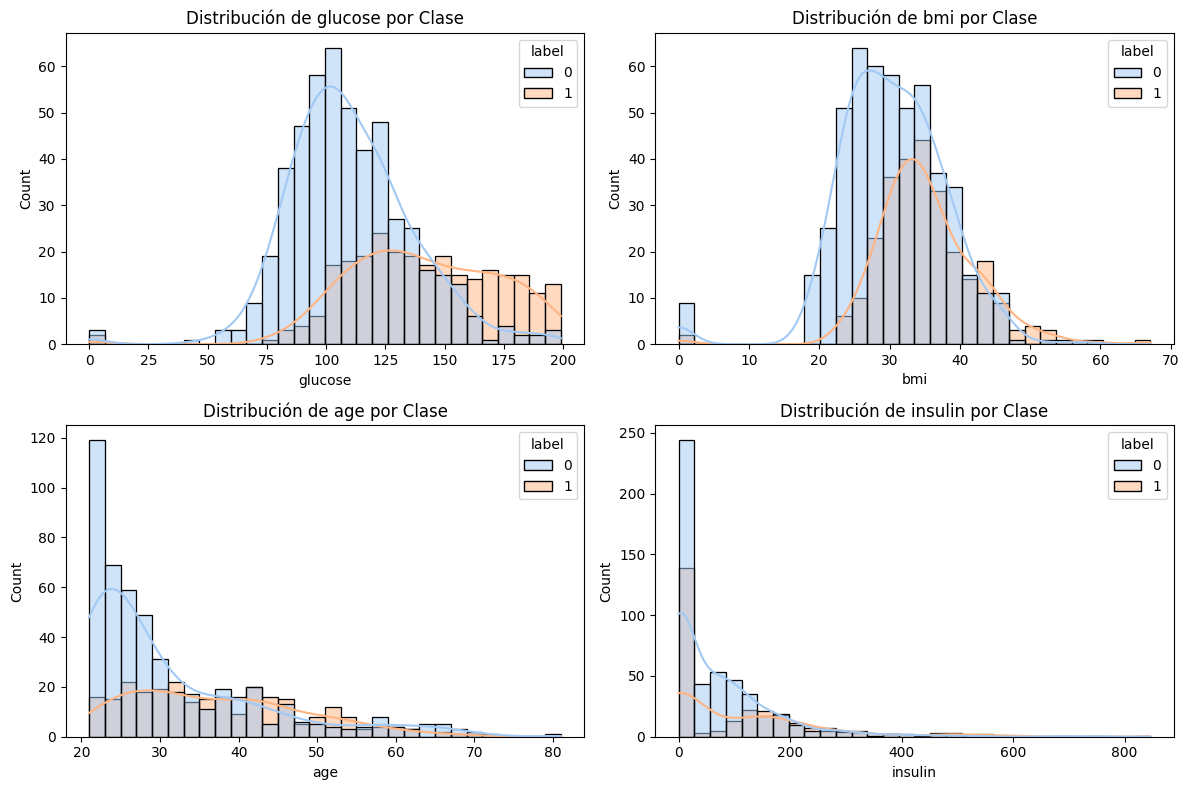

In [ ]:

# Ver la distribución de la variable objetivo (diabetes o no)
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=pima, palette='pastel')
plt.title("Distribución de Pacientes con Diabetes (1) y Sin Diabetes (0)")
plt.xlabel("Clase")
plt.ylabel("Cantidad de Pacientes")
plt.show()

# Matriz de correlación entre variables
plt.figure(figsize=(10,6))
sns.heatmap(pima.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Distribución de características según la clase
features = ['glucose', 'bmi', 'age', 'insulin']
plt.figure(figsize=(12,8))
for i, feature in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=pima, x=feature, hue="label", kde=True, bins=30, palette="pastel")
    plt.title(f"Distribución de {feature} por Clase")
plt.tight_layout()
plt.show()

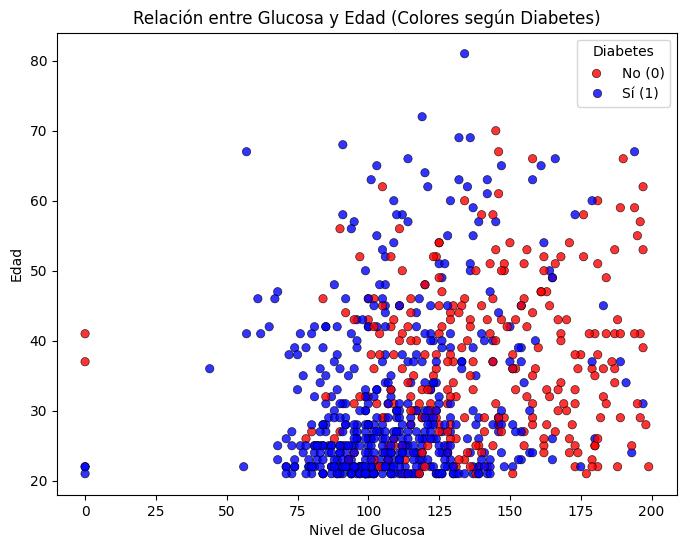

In [5]:


# Configurar estilo
plt.figure(figsize=(8,6))

# Graficar puntos con colores según el label
sns.scatterplot(x=pima['glucose'], y=pima['age'], hue=pima['label'], 
                palette={0: "blue", 1: "red"}, edgecolor="black", alpha=0.8)

                

# Configurar títulos y etiquetas
plt.title("Relación entre Glucosa y Edad (Colores según Diabetes)")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Edad")
plt.legend(title="Diabetes", labels=["No (0)", "Sí (1)"])
plt.show()

/Users/aldacortes/Documents/Master/PatterRecognition/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aldacortes/Documents/Master/PatterRecognition/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

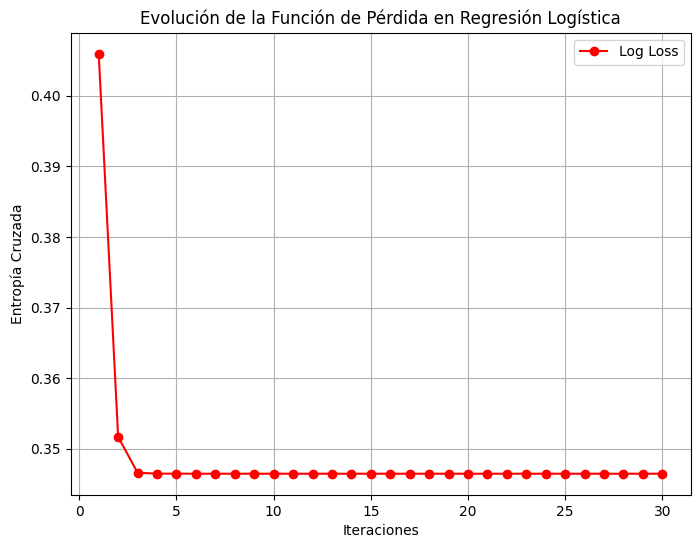

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Generar un dataset sintético
X, y = make_classification(n_samples=200, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar la regresión logística con `warm_start=True` para actualizar los pesos en cada iteración
logreg = LogisticRegression(max_iter=1, warm_start=True, solver="lbfgs")

losses = []  # Lista para almacenar la función de pérdida en cada iteración

# Entrenamos paso a paso hasta 30 iteraciones y registramos la pérdida
for i in range(30):
    logreg.fit(X_train, y_train)  # Entrenamiento por 1 iteración
    y_prob = logreg.predict_proba(X_train)  # Obtener probabilidades
    loss = log_loss(y_train, y_prob)  # Calcular entropía cruzada
    losses.append(loss)  # Guardar pérdida

# Graficar la evolución de la función de pérdida
plt.figure(figsize=(8,6))
plt.plot(range(1, 31), losses, marker='o', linestyle='-', color='red', label="Log Loss")
plt.xlabel("Iteraciones")
plt.ylabel("Entropía Cruzada")
plt.title("Evolución de la Función de Pérdida en Regresión Logística")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)


In [ ]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=200)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 427.9555555555555, 'Predicted label')

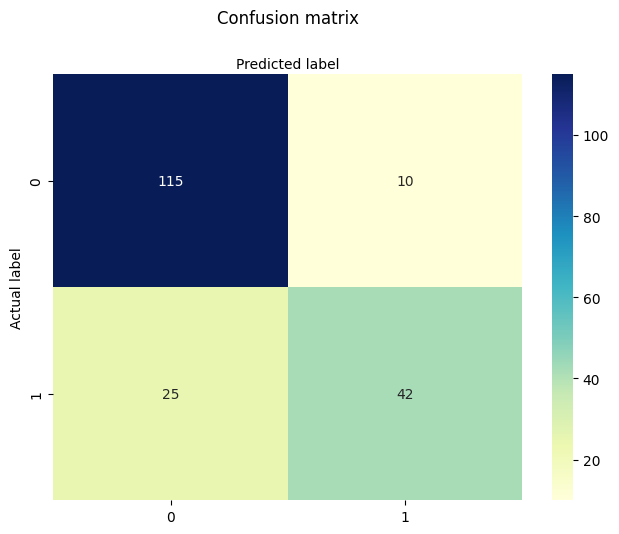

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


![CleanShot 2025-03-03 at 10.06.28@2x.png](./confussion-matrix.png)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



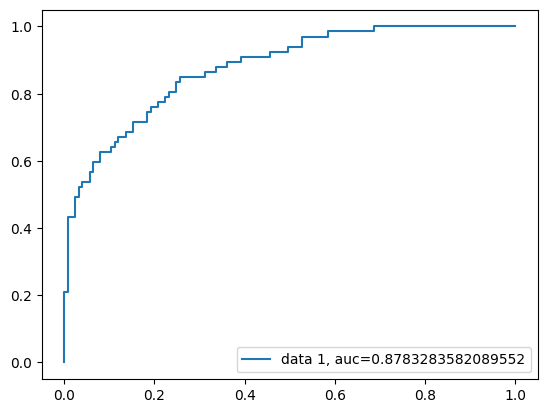

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()